In [2]:
import pyuvdata
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
use_freq_bands = [
    "13",
    "18",
    "20",
    "23",
    "27",
    "29",
    "32",
    "34",
    "36",
    "38",
    "41",
    "46",
    "50",
    "55",
    "59",
    "64",
    "69",
    "73",
    "78",
    "82",
]

In [4]:
obs_ind = 0
uv = None
for freq_band in use_freq_bands:
    filename = f"/lustre/pipeline/calibration/{freq_band}MHz/2025-05-05/12/20250505_125619_{freq_band}MHz.ms"
    # filename = f"/lustre/pipeline/slow/{freq_band}MHz/2025-11-04/19/20251104_190446_{freq_band}MHz.ms"
    # filename = f"/lustre/pipeline/slow/{freq_band}MHz/2025-11-03/01/20251103_011328_{freq_band}MHz.ms"
    if os.path.isdir(filename):
        uv_new = pyuvdata.UVData()
        uv_new.read(filename)
        uv_new.select(ant_str="auto")
        if obs_ind == 0:
            uv = uv_new
        else:
            uv += uv_new
        obs_ind += 1

Setting telescope_location to value in known_telescopes for OVRO-LWA.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 11.988083211761591 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 11.987913433926337 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 6.308315008294926 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
Setting telescope_location to value in known_telescopes 

Casting complex values to real discards the imaginary part


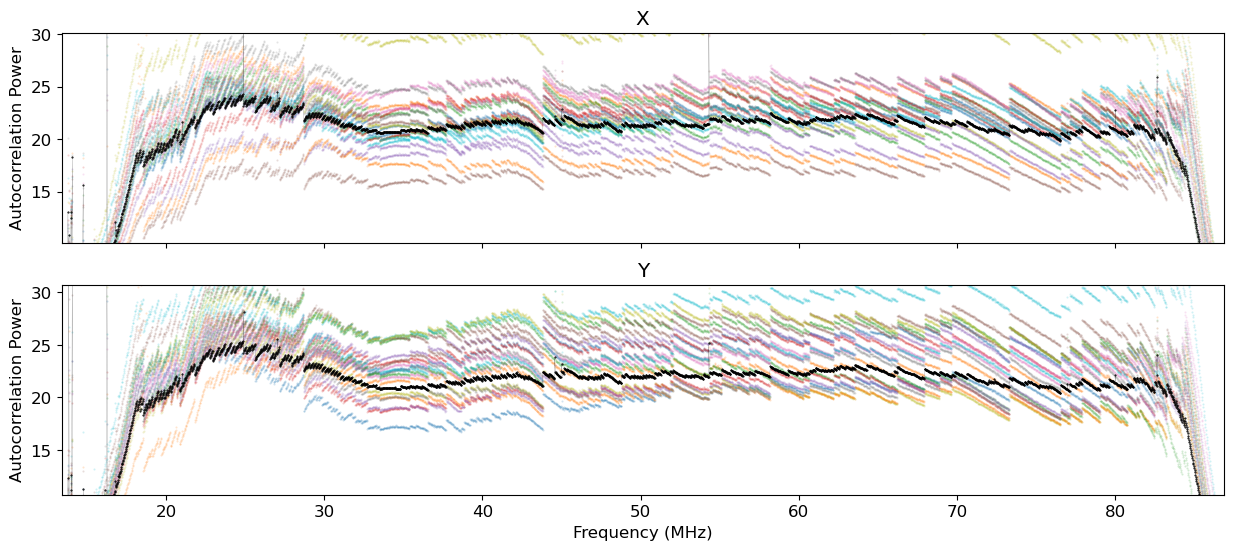

In [54]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15,6))
ax[1].set_xlabel("Frequency (MHz)")
pol_names = ["X", "Y"]
for pol in range(2):
    ax[pol].set_ylabel("Autocorrelation Power")
    ax[pol].set_title(pol_names[pol])
    ax[pol].set_xlim(np.min(uv.freq_array)/1e6, np.max(uv.freq_array)/1e6)
    ax[pol].set_ylim(np.nanmean(uv.data_array[:, :, pol]) - 10, np.nanmean(uv.data_array[:,:,pol]) + 10)
    for ant in range(20):
        ax[pol].plot(uv.freq_array/1e6, uv.data_array[ant, :, pol], ".", markersize=1, alpha=0.2)
    ax[pol].plot(uv.freq_array/1e6, np.nanmean(uv.data_array, axis=0)[:, pol], ".-", linewidth=0.1, markersize=1, color="black")
plt.show()
plt.close()

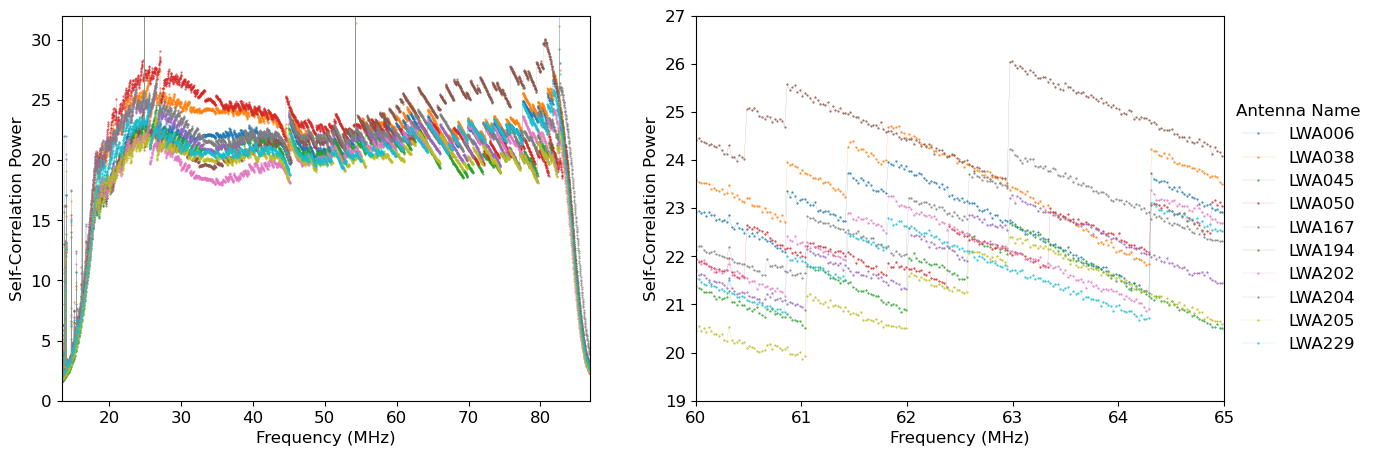

In [53]:
plot_mean = False
# plot_ant_inds = np.sort(np.unique(np.random.randint(low=0, high=352, size=10)))
plot_ant_inds = np.array([68, 77, 83, 115, 268, 273, 278, 294, 297, 305])
plt.rcParams["font.size"] = 12
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].set_xlabel("Frequency (MHz)")
ax[1].set_xlabel("Frequency (MHz)")
ax[0].set_ylabel("Self-Correlation Power")
ax[1].set_ylabel("Self-Correlation Power")
ax[0].set_xlim(np.min(uv.freq_array) / 1e6, np.max(uv.freq_array) / 1e6)
ax[0].set_ylim(
    #np.nanmean(uv.data_array[:, :, pol]) - 10,
    0,
    32,
)
ax[1].set_xlim(60,65)
ax[1].set_ylim(19, 27)

for ant in plot_ant_inds:
    ax[0].plot(
        uv.freq_array / 1e6,
        uv.data_array[ant, :, pol],
        ".-",
        markersize=1,
        linewidth=0.1,
        alpha=0.8,
        #label=uv.telescope.antenna_names[uv.ant_1_array[ant]],
    )
    ax[1].plot(
        uv.freq_array / 1e6,
        uv.data_array[ant, :, pol],
        ".-",
        markersize=1,
        linewidth=0.1,
        alpha=1,
        label=uv.telescope.antenna_names[uv.ant_1_array[ant]],
    )
fig.legend(title="Antenna Name", loc="outside center right", frameon=False)
if plot_mean:
    ax.plot(
        uv.freq_array / 1e6,
        np.nanmean(uv.data_array, axis=0)[:, pol],
        ".-",
        markersize=1,
        linewidth=0.1,
        color="black",
    )
plt.tight_layout
plt.show()
plt.close()

In [31]:
plot_ant_inds

array([ 68,  77,  83, 115, 268, 273, 278, 294, 297, 305])